In [9]:
def convert_rgb_to_gray(im_1):
    m=im_1.shape[0]
    n=im_1.shape[1]
    im_2=np.zeros((m,n),dtype='uint8')
    for i in range(m):
        for j in range(n):
            im_2[i,j]=get_instance(im_1[i,j,:])
    return im_2
def get_instance(v,w=[1/3,1/3,1/3]):
    a,b,c=v[0],v[1],v[2]
    w1,w2,w3=w[0],w[1],w[2]
    d=((a**2)*w1 + (b**2)*w2 + (c**2)*w3)**.5
    return d
def get_default_mask_for_mean():
    return np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3)/9
def apply_mask(part_of_image):
    mask=get_default_mask_for_mean()
    return sum(sum(part_of_image*mask))

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

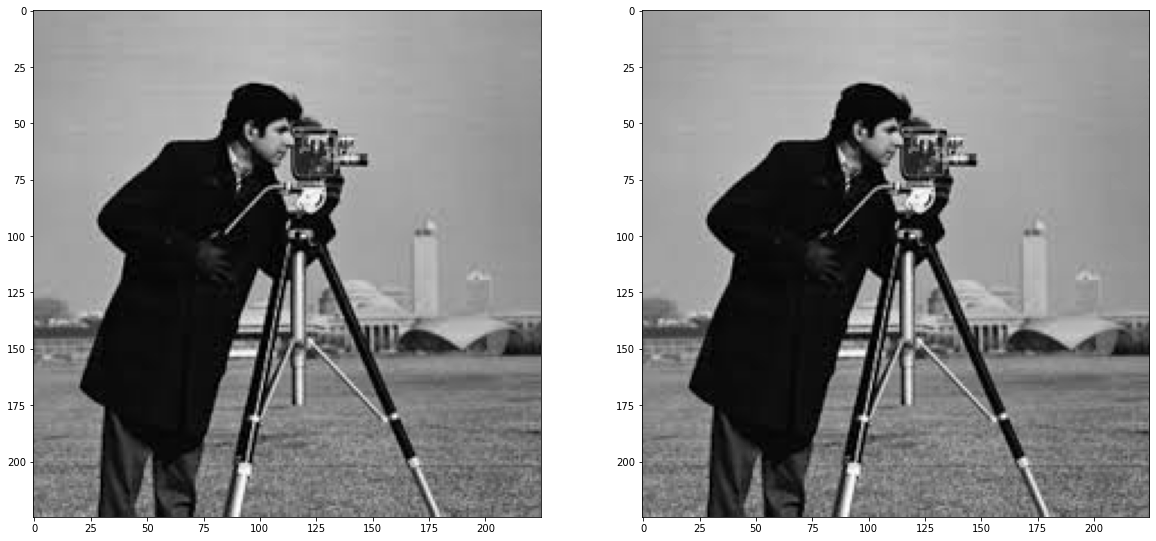

In [14]:
img_orjinal=mpimg.imread('cameraman.jpg')
img_graylevel=convert_rgb_to_gray(img_orjinal)
%matplotlib inline
plt.figure(figsize=(20,20))
plt.subplot(1,2,1),plt.imshow(img_orjinal)
plt.subplot(1,2,2),plt.imshow(img_graylevel,cmap='gray')
plt.show()

In [30]:
def get_median_for_5e5(poi):
    s_1=poi.reshape(1,25)
    s_1.sort()
    return s_1[0,13]
def get_median_3e3(poi):
    s_1=poi.reshape(1,9)
    s_1.sort()
    return s_1[0,4]
def get_mean_filter_for_5e5(img):
    m=img.shape[0]
    n=img.shape[1]
    img2=np.zeros((m,n))
    for i in range(3,m-3):
        for j in range(3,n-3):
            poi=img[i-2:i+3,j-2:j+3]
            img2[i,j]=get_median_for_5e5(poi)
    return img2
def get_mean_filter_3e3(img):
    m=img.shape[0]
    n=img.shape[1]
    img2=np.zeros((m,n))
    for i in range(1,m-1):
        for j in range(1,n-1):
            poi=img[i-1:i+2,j-1:j+2]
            img2[i,j]=get_median_3e3(poi)
    return img2

In [31]:
i,j=10,10
poi=img_graylevel[i-2:i+3,j-2:j+3]
poi

array([[158, 159, 159, 159, 160],
       [158, 159, 159, 159, 160],
       [158, 159, 159, 159, 160],
       [158, 159, 159, 159, 160],
       [158, 159, 159, 159, 160]], dtype=uint8)

In [32]:
poi.shape

(5, 5)

In [33]:
temp=poi.reshape(1,25)
temp.sort()
temp

array([[158, 158, 158, 158, 158, 159, 159, 159, 159, 159, 159, 159, 159,
        159, 159, 159, 159, 159, 159, 159, 160, 160, 160, 160, 160]],
      dtype=uint8)

In [34]:
temp[0,4]

158

In [35]:
apply_mask(img_graylevel[1:4,1:4])

156.66666666666666

(<matplotlib.axes._subplots.AxesSubplot at 0x1c0030e02e0>,
 <matplotlib.image.AxesImage at 0x1c0030ab1f0>)

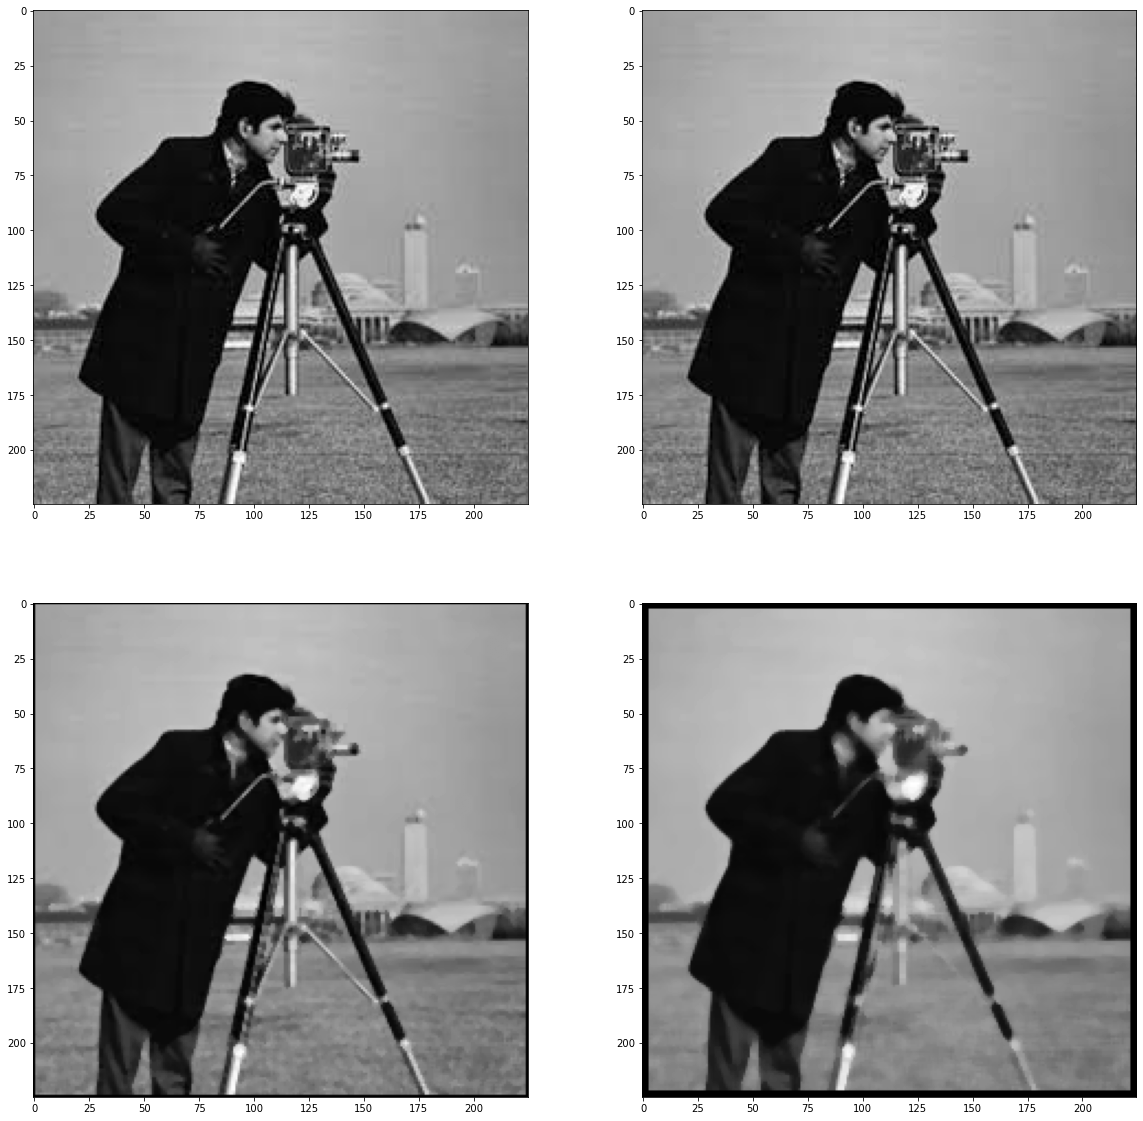

In [38]:
img_5e5mask=get_mean_filter_for_5e5(img_graylevel)
img_3e3mask=get_mean_filter_3e3(img_graylevel)

plt.figure(figsize=(20,20))

plt.subplot(2,2,1),plt.imshow(img_orjinal)
plt.subplot(2,2,2),plt.imshow(img_graylevel,cmap='gray')
plt.subplot(2,2,3),plt.imshow(img_3e3mask,cmap='gray')
plt.subplot(2,2,4),plt.imshow(img_5e5mask,cmap='gray')
